In [1]:
from sklearn import preprocessing
from sklearn import datasets
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.random as nr
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender = pd.read_csv('gender_submission.csv')
test = pd.concat((test, gender), axis=1)
print(data.shape, '\n')
print(data.dtypes)
test.drop(['PassengerId', 'Cabin', 'Ticket', 'Name'], inplace = True, axis=1)
data.drop(['PassengerId', 'Cabin', 'Ticket', 'Name'], inplace = True, axis=1)
test.shape

(891, 12) 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


(418, 8)

In [3]:
print(data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f'))))
test.head()

         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,34.5,0,0,7.8292,Q,0
1,3,female,47.0,1,0,7.0000,S,1
2,2,male,62.0,0,0,9.6875,Q,0
3,3,male,27.0,0,0,8.6625,S,0
4,3,female,22.0,1,1,12.2875,S,1


In [4]:
# for i in data.columns:
#     print(data[i].value_counts(), '\n', '----------------------')

In [5]:
print('Column - Type - Number of modalities - Percentage of NAN')
print('----------------------------------------------------------------------')
for col in data.columns:
    print('%s - %s - %s - %s'%(col, data[col].dtypes, len(data[col].unique()), round(data[col].isnull().sum() / len(data), 3)))
print('----------------------------------------------------------------------')

Column - Type - Number of modalities - Percentage of NAN
----------------------------------------------------------------------
Survived - int64 - 2 - 0.0
Pclass - int64 - 3 - 0.0
Sex - object - 2 - 0.0
Age - float64 - 89 - 0.199
SibSp - int64 - 7 - 0.0
Parch - int64 - 7 - 0.0
Fare - float64 - 248 - 0.0
Embarked - object - 4 - 0.002
----------------------------------------------------------------------


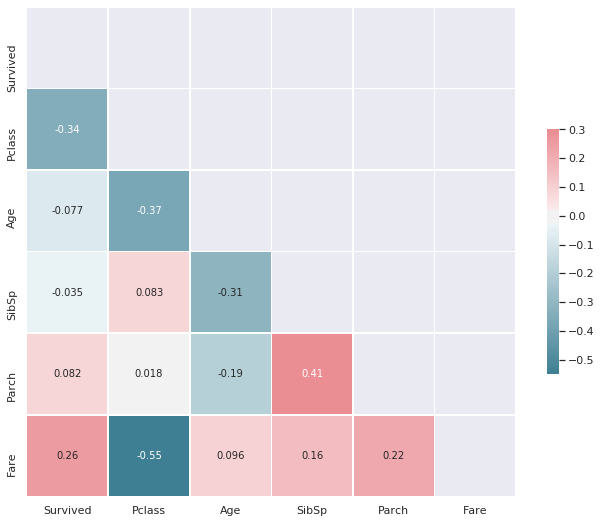

In [6]:
corr = data.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [7]:
mean = data["Age"].mean()
std = data["Age"].std()
nan_ = data["Age"].isnull().sum()

# fill NaN values in Age column with random values generated from a normal distribution 
# with the mean and std of Age

data['Age'].fillna(np.random.randint(mean - std, mean + std), inplace=True)
data['Age']
test['Age'].fillna(np.random.randint(mean - std, mean + std), inplace=True)
test.dropna(inplace=True)
data.dropna(inplace=True)

In [8]:
# sum up those related columns
data['fam_Size'] = data['SibSp'] + data['Parch'] + 1
test['fam_Size'] = test['SibSp'] + test['Parch'] + 1

In [9]:
#discretization for continuous variables
data['discretize_age'] = pd.cut(data['Age'], bins=[0,10,20,40,60,100])
data['discretize_fare'] = pd.cut(data['Fare'], bins=[0,10,15,30,100,550])

In [10]:
from sklearn.linear_model import LinearRegression

data['Sex'] = data['Sex'].astype('category').cat.codes
test['Sex'] = test['Sex'].astype('category').cat.codes
# X = data['Fare'].values.reshape(-1, 1)
# X = data['Sex'].values.reshape(-1, 1)
# X = data['Age'].values.reshape(-1, 1)
# X = data['Pclass'].values.reshape(-1, 1)
X = data[['Age', 'Fare', 'Pclass', 'Sex']]
y = data['Survived']

lin_reg = LinearRegression()
lin_reg = lin_reg.fit(X, y)
lin_reg.score(X, y)

0.38153606788200567

In [11]:
import sklearn.metrics as sklm
def print_metrics(y_true, y_predicted):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(np.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R²                     = ' + str(r2))

X_test = test[['Age', 'Fare', 'Pclass', 'Sex']]
y_pred = lin_reg.predict(X_test)
y_test = test['Survived']
print_metrics(y_test, y_pred) 

Mean Square Error      = 0.07076742574572117
Root Mean Square Error = 0.26602147609868115
Mean Absolute Error    = 0.22565055912116466
Median Absolute Error  = 0.20341624636435163
R²                     = 0.6944966014027383
